# Text by the Numbers: Counting Words across Multiple Texts

**A Reproducible Research Workshop**

(A Collaboration between Dartmouth Library and Research Computing)

[*Click here to view or register for our current list of workshops*](http://dartgo.org/RRADworkshops)

*This notebook created by*:
+ Version 1.0: Jeremy Mikecz, Research Data Services (Dartmouth Library)
+ Version 2.0: ???
<!--
+ Some of the inspiration for the code and information in this notebook was taken from https://www.w3schools.com/python/python_intro.asp -- This is a great resource if you want to learn more about Python!-->

**How can we use computational techniques to analyze texts and then visualize patterns buried within them?** 

**What can we learn about texts by applying text analysis in Python? How do we get started?**

This is **Notebook 2** of 2 for the **Text by the Numbers: Text Analysis Methods in Python** workshop:
+ Notebook 1: Text by the Numbers: Working with Texts one text
+ Notebook 2: Text by the Numbers 2: Text Analysis across Multiple Texts

In this session, participants will:

+ Learn how to write basic scripts in Python using Jupyter Notebooks
+ import and pre-process documents (into lists of words or tokens, lower-case each word, remove "stopwords", etc.)
+ analyze each document using word frequencies, collocations, ngram frequencies, etc.

**Table of Contents**

+ I. Setup
+ 

## Part I: Setup

1. Before beginning, we need to import some packages.

In [67]:
import pathlib
from pathlib import Path
import glob 

textdir = Path("~/shared/RR-workshop-data/state-of-the-union-dataset/txt").expanduser() 
pathlist = sorted(textdir.glob('*.txt')) 

<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">2. Choose a corpus you would like to analyze further. Save a Path to this corpus. You can see if it worked correctly by running: `[path.name for path in pathlist]`
</div>

## II. Create a Dataframe of processed texts

**3. DATAFRAMES:** To enable easier analysis of a corpus of texts, we can store info about each in a **dataframe**. A dataframe in Python is a common data structure enabled with the **pandas** library. It is a two-dimensional data table that stores data in rows and columns. 

Run the code below, and then examine what each portion of the code does (see the "#comments").

In [68]:
import pandas as pd
import numpy as np
import nltk
from nltk import RegexpTokenizer  
from nltk.corpus import stopwords
stop = sorted(stopwords.words('english'))

In [69]:
tokenizer = RegexpTokenizer(r'\w+')
#n=50

txtList=[]
pathlist = sorted(textdir.glob('*.txt'))      # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
for path in pathlist:
    fn=path.stem                       #stem returns the filename minus the ".txt" (file extension). 
    pres,year=fn.split("_")            # fn = "1794_Washington" becomes year = "1794" and pres = "Washington"
    with open(path,'r') as f:  
        text1 = f.read()                #opens each file and reads it in as "sotu"
    tokens=tokenizer.tokenize(text1)    # tokenizes "sotu"
    numtoks = len(tokens)             # counts the number of tokens in "sotu"
    ltokens_ns = [tok.lower() for tok in tokens if tok not in stop]
    txtList.append([pres, year, numtoks, tokens, ltokens_ns, text1])   #add this info for "sotu" to a running list for all sotu addresses
       

4. We have thus stored information about each text into a list call `txtList`. Now we want to read in this list of information into a dataframe.

In [70]:
colnames=['pres','year','numtoks','tokens', 'ltoks_ns', 'fulltext']
textdf=pd.DataFrame(txtList, columns=colnames)  #places our completed list of SOTU info in a dataframe
textdf.head(10)                                #prints out the first 10 rows of this dataframe (the default value for head() is 5 rows)

,pres,year,numtoks,tokens,ltoks_ns,fulltext
0,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
1,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
2,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
3,Adams,1800,1374,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
4,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
5,Adams,1826,7852,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
6,Adams,1827,7064,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
7,Adams,1828,7398,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
8,Arthur,1881,3903,"[To, the, Senate, and, House, of, Representati...","[to, senate, house, representatives, united, s...",To the Senate and House of Representatives of ...
9,Arthur,1882,3157,"[To, the, Senate, and, House, of, Representati...","[to, senate, house, representatives, united, s...",To the Senate and House of Representatives of ...


<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">5. Using your chosen corpus:</p>
    <ol style="color:blue"> 
        <li>read it</li> 
        <li>lower-case it</li> 
        <li>remove all stopwords</li>
        <li>count the number of tokens</li>
        <li>and read this information into a dataframe</li>
    </ol>
</div>

## III. Create a visualization exploring the length of SOTU addresses

6. Now that we have placed our State of the Union (SOTU) corpus into a dataframe, we can create some basic visualizations. For example, we can create a chart comparing the changing length of SOTU addresses over time.

Fortunately, Python's **seaborn** library makes the creation of visualizations really easy. In the code below, we import seaborn (with its conventional abbreviation of "sns") and **matplotlib** the visualization library on which seaborn is built. Then, in one line of code, we can create a bar graph.

<Axes: xlabel='year', ylabel='numtoks'>

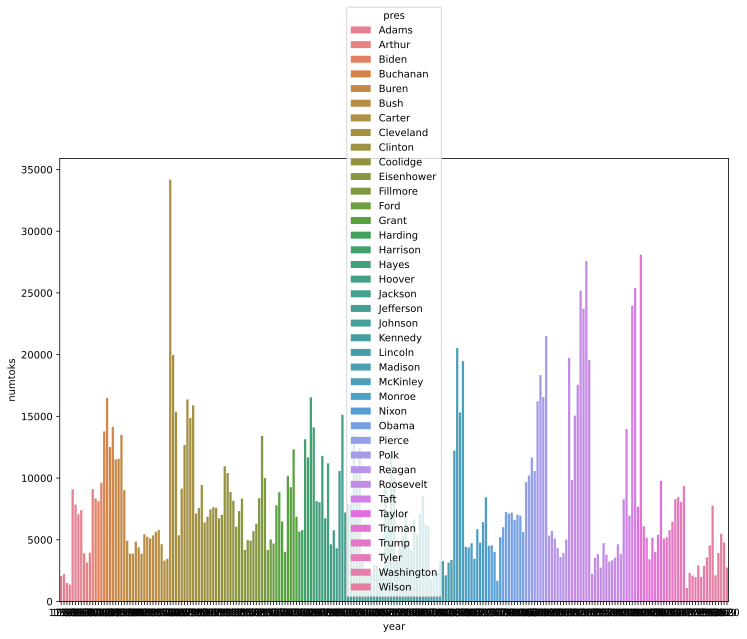

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(textdf, x = "year", y = "numtoks", hue = "pres")

7. But, as you notice, creating a visualization may be easy, but creating one that is legible and interpretable often requires more work. 

What problems do you notice in the graph above? How would you go about correcting them?

## IV. Visualizing the frequency of words across a corpus

8. One of the most basic forms of text analysis is to calculate and visualize the frequency of particular words or terms (ngrams) across a corpus. We are going to do such a thing here. But, first we should re-examine our dataset:



In [72]:
textdf.head()

,pres,year,numtoks,tokens,ltoks_ns,fulltext
0,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
1,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
2,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
3,Adams,1800,1374,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
4,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...


9. To identify the frequency of a given term for a given speech, we will want to create a frequency list of words (as found in out lower-case tokens column) and then identify the frequency in which a chose word is found.

In [73]:
import collections    # use for creating frequency lists


In [74]:
list_of_nums = [3, 5, 7, 1, 4, 2, 12, 1, 28, 4, 5, 57, 1, 54, -4, 6, 2, 1, 2, 7, 5, 3, 88, 99, 57, 36, 1, 4, 2, 3, 8, 9, 15, 2, 3, 7]
collections.Counter(list_of_nums)

Counter({1: 5,
         2: 5,
         3: 4,
         5: 3,
         7: 3,
         4: 3,
         57: 2,
         12: 1,
         28: 1,
         54: 1,
         -4: 1,
         6: 1,
         88: 1,
         99: 1,
         36: 1,
         8: 1,
         9: 1,
         15: 1})

10. We can retrieve the frequency of a particular number by 1) saving the Counter object (essentially frequency list stored as a dictionary) into memory, and 2) retrieving the count for a particular item.

In [75]:
numfreq = collections.Counter(list_of_nums)
numfreq[3]

4

11. We can do the same to a list of (lower-case) tokens...

In [76]:
ltoks_sample = textdf.loc[0, "ltoks_ns"]
ltoks_sample[:10]

['gentlemen',
 'senate',
 'gentlemen',
 'house',
 'representatives',
 'i',
 'time',
 'apprehensive',
 'would',
 'necessary']

11b. create a function to retrieve the frequency of a word in a list of tokens...

In [77]:
def getWordFreq (ltoks, term):
    tokfreqs=collections.Counter(ltoks)
    wordFreq = tokfreqs[term]
    return(wordFreq)

11c. call that function on our sample list of tokens and with a given search word...

In [78]:
getWordFreq(ltoks_sample, "war")   #try replacing "war" with a word of your choice

4

11d. ... and then use the dataframe **.apply() method to apply this function on our lower-case tokens column and create a new column that reports the number of times a given search term appears in that list of tokens:

In [79]:
search_term = "freedom"
textdf['wordfreq'] = textdf['ltoks_ns'].apply(getWordFreq, term = search_term)
textdf.head()

,pres,year,numtoks,tokens,ltoks_ns,fulltext,wordfreq
0,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...,0
1,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...,0
2,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...,0
3,Adams,1800,1374,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...,0
4,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...,1


12. But, to better fit this information on a graph, we can aggregate the data by president to reduce our dataset from 233 observations (speeches) to 44 (presidents).\* This means, for example, that Ronald Reagan's 8 SOTU speeches are compiled into one combined text. To do this, first we need to sort the dataframe by the year of the address.

\* Yes, Biden is considered the 46th president. But, two presidents died without ever giving a SOTU speech, hence the number 44. Even that number is debatable as Grover Cleveland is considered the US's 22nd and 24th president as he served two non-consecutive terms. And, then there is the matter of the various presidents of the Congress of the Confederation that served from 1774 to 1788.

In [80]:
textdf = textdf.sort_values(by = "year")
textdf.head()

,pres,year,numtoks,tokens,ltoks_ns,fulltext,wordfreq
218,Washington,1790,1096,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...","Fellow Citizens of the Senate, and House of Re...",0
219,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,0
220,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,0
221,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,1
222,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,0


12b. and then assign a number to each new administration. Since our dataframe is now sorted by year, we can use the **.shift()** method to create a new colum for presidential number ("presnum") that increases by one every time a new president ("pres") appears in our sorted dataframe.

In [81]:
textdf["presnum"] = (textdf["pres"] != textdf["pres"].shift()).cumsum()
textdf.tail(12)

,pres,year,numtoks,tokens,ltoks_ns,fulltext,wordfreq,presnum
157,Obama,2012,7204,"[Mr, Speaker, Mr, Vice, President, members, of...","[mr, speaker, mr, vice, president, members, co...","Mr. Speaker, Mr. Vice President, members of Co...",1,42
158,Obama,2013,6607,"[Mr, Speaker, Mr, Vice, President, Members, of...","[mr, speaker, mr, vice, president, members, co...","Mr. Speaker, Mr. Vice President, Members of Co...",3,42
159,Obama,2014,7017,"[Mr, Speaker, Mr, Vice, President, Members, of...","[mr, speaker, mr, vice, president, members, co...","Mr. Speaker, Mr. Vice President, Members of Co...",1,42
160,Obama,2015,6961,"[Mr, Speaker, Mr, Vice, President, Members, of...","[mr, speaker, mr, vice, president, members, co...","Mr. Speaker, Mr. Vice President, Members of Co...",1,42
161,Obama,2016,5628,"[Mr, Speaker, Mr, Vice, President, Members, of...","[mr, speaker, mr, vice, president, members, co...","Mr. Speaker, Mr. Vice President, Members of Co...",2,42
210,Trump,2017,5095,"[Thank, you, very, much, Mr, Speaker, Mr, Vice...","[thank, much, mr, speaker, mr, vice, president...","Thank you very much. Mr. Speaker, Mr. Vice Pre...",3,43
211,Trump,2018,5204,"[Mr, Speaker, Mr, Vice, President, Members, of...","[mr, speaker, mr, vice, president, members, co...","Mr. Speaker, Mr. Vice President, Members of Co...",6,43
212,Trump,2019,5777,"[Madam, Speaker, Mr, Vice, President, Members,...","[madam, speaker, mr, vice, president, members,...","Madam Speaker, Mr. Vice President, Members of ...",5,43
213,Trump,2020,6474,"[Thank, you, very, much, Thank, you, Thank, yo...","[thank, much, thank, thank, much, madam, speak...",Thank you very much. Thank you. Thank you very...,7,43
12,Biden,2021,8351,"[Thank, you, Thank, you, Thank, you, Good, to,...","[thank, thank, thank, good, back, as, mitch, c...",Thank you. Thank you. Thank you. Good to be ba...,0,44


12c. We can then group the dataframe by president number. We can use the the **.agg()** method to choose how to aggregate the data in the columns we which to keep. 

In [82]:
textdf2 = textdf.groupby(['presnum']).agg({'pres':'first','wordfreq':'sum','numtoks':'sum','year':'first'})
textdf2.head()

,pres,wordfreq,numtoks,year
presnum,,,,
1,Washington,1,15271,1790
2,Adams,0,7157,1797
3,Jefferson,4,20743,1801
4,Madison,3,21738,1809
5,Monroe,4,42512,1817


13. However, as we noticed in the bar plot in #6 above, the length of SOTU speeches has varied greatly over time, from addresses that barely topped 1,000 words to those that nearly reached 40,000. 

Thus, for better comparison, we will want to calculate the frequency rather than just absolute number of times a word appears. This can be done by dividing the absolute word frequency of a search term by the number of words (ahem... tokens). We can then multiply the result by 1,000,000 to get the frequency a term was used across one million words.

In [83]:
textdf2['freq_perMillion'] = textdf2['wordfreq'] / textdf2['numtoks'] * 1000000
textdf2.head()

,pres,wordfreq,numtoks,year,freq_perMillion
presnum,,,,,
1,Washington,1,15271,1790,65.483596
2,Adams,0,7157,1797,0.000000
3,Jefferson,4,20743,1801,192.836137
4,Madison,3,21738,1809,138.007176
5,Monroe,4,42512,1817,94.091080


In [84]:
textdf2.sort_values('freq_perMillion',ascending=False).head()

,pres,wordfreq,numtoks,year,freq_perMillion
presnum,,,,,
38,Reagan,93,33031,1982,2815.536920
41,Bush,83,40867,2001,2030.978540
33,Kennedy,23,12100,1962,1900.826446
39,Bush,32,17530,1989,1825.442099
32,Eisenhower,85,47800,1954,1778.242678


14. We can then graph the results, but this time tweaking some settings in matplotlib and seaborn to create a chart that is more legible:

C:\Users\F0040RP\AppData\Local\Temp\ipykernel_31456\2071433017.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels = textdf2.pres)


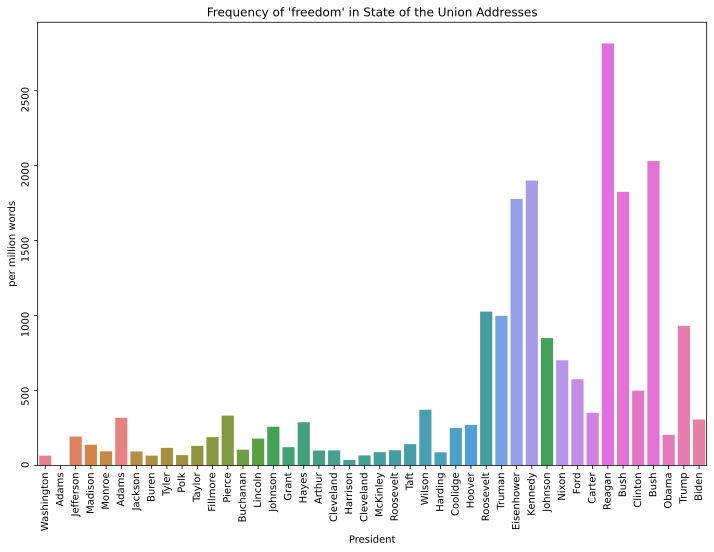

In [85]:
plt.rcParams['figure.figsize'] = [12, 8]  #changes default figure size to make larger plots
%config InteractiveShellApp.matplotlib = 'inline'
%config InlineBackend.figure_formats = ['svg']

g=sns.barplot(data=textdf2, x="year", y="freq_perMillion", hue = "pres")
g.tick_params(labelrotation=90)
g.set(title = "Frequency of '%s' in State of the Union Addresses"%search_term)
g.set(ylabel='per million words', xlabel='President')
g.set(xticklabels = textdf2.pres)
plt.legend([],[], frameon=False); #adding the ";" removes the annoying text that Python sometimes prints out with a graphic#

## V. Reproducible visualization

15. This seems to have worked well. But, now imagine that we want to re-run this code multiple times to explore the frequency of different words. To enable such repetition, it helps to place our relevant code inside functions that can easily be called:

In [86]:
def word_search2(ltoksCol,searchTerm): #returns a column of frequencies after searching for a term across a column of lower-case tokens
    #searchTerm = searchTerm.lower()
    wordfreq = ltoksCol.apply(lambda x:collections.Counter(x)[searchTerm])
    return(wordfreq)

def df_wordfreqcalc(old_df,searchTerm):   
    """
    reads in a dataframe of SOTU addresses by year and a searchTerm 
    returns a dataframe aggregated by President, with the 'wordfreq' and 'freq_perMillion' calculated for each president
       which is calculated using the sotuWordSearch2 function
    """
    requiredCols = ['ltoks','numtoks','pres','presnum','year']
    if not set(requiredCols).issubset(old_df.columns):
        print("missing required column from:",requiredCols)
        return None
    old_df['wordfreq'] = word_search2(old_df['ltoks'],searchTerm) 
    new_df = old_df.groupby(['pres','presnum']).agg({'wordfreq':'sum','numtoks':'sum','year':'first'})
    #print(new_df.head(2))
    new_df['freq_perMillion'] = new_df['wordfreq'] / new_df['numtoks'] * 1000000
    new_df = new_df.sort_values(['year'])
    new_df = new_df.reset_index()
    print("searching for... :",searchTerm)
    return(new_df)
 
def create_wordfreqplot(df,searchTerm):            
    """
    #reads in our aggregated SOTU dataframe and creates a bar plot of the search term
    """
    #newdf = df_wordFreqCalc(df,searchTerm)
    requiredCols = ['freq_perMillion','pres','presnum']
    if not set(requiredCols).issubset(df.columns):
        print("missing required column from:",requiredCols)
        return None
    g=sns.barplot(data=df, x="presnum",y="freq_perMillion", hue = "pres")
    g.tick_params(labelrotation=90)
    g.set(title = "Frequency of '%s' in State of the Union Addresses"%searchTerm)
    g.set(ylabel='per million words', xlabel='President')
    g.set(xticklabels = df.pres)
    plt.legend([],[], frameon=False);
    return(g)

In [87]:
textdf = textdf.rename(columns = {"ltoks_ns": "ltoks"})
textdf.head()

,pres,year,numtoks,tokens,ltoks,fulltext,wordfreq,presnum
218,Washington,1790,1096,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...","Fellow Citizens of the Senate, and House of Re...",0,1
219,Washington,1791,2314,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,0,1
220,Washington,1792,2104,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,0,1
221,Washington,1793,1973,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,1,1
222,Washington,1794,2918,"[Fellow, Citizens, of, the, Senate, and, House...","[fellow, citizens, senate, house, representati...",Fellow-Citizens of the Senate and House of Rep...,0,1


16. Now, to create graphs charting the frequency of different terms, all we need to run are the three lines of code below. 

searching for... : indian


C:\Users\F0040RP\AppData\Local\Temp\ipykernel_31456\751458943.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels = df.pres)


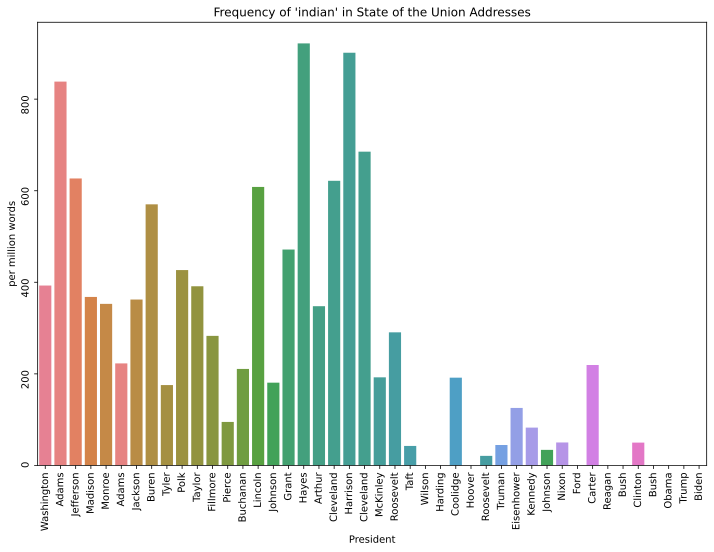

In [88]:
searchTerm = "indian"      # try replacing this with other terms (but remember this is searching on a lower-case list of tokens, so you will want to input a lower-case word)
textdf3 = df_wordfreqcalc(textdf,searchTerm)
create_wordfreqplot(textdf3,searchTerm);

<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">17. Using the custom functions above and the SOTU dataframe:</p>
    <ol style="color:blue"> 
        <li>a. Choose a search term</li>
        <li>1. Create some bar graphs showing the distribution of this term across the corpus.</li> 
    </ol>
</div>

<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises - Advanced</b>:</p> 
    <p style="color:blue">18. Create a series of functions that re-create the frequency graphs above but for a different corpus. Note: the functions above were specifically designed with the SOTU dataset in mind and require columns such as "pres", "presnum", and "year." How will you go about adjusting those functions (or starting from scratch) in a way that works with different types of corpora?</p>
</div>